### Silhouette Coefficient

In [1]:
#Importing libraries:
    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Generating some random data:

X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

In [3]:
Z.head()

,0,1
0,0.103982,0.489555
1,0.069558,0.318007
2,0.750454,0.195152
3,0.754573,0.301488
4,0.622667,0.270076


C:\Users\aicyb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

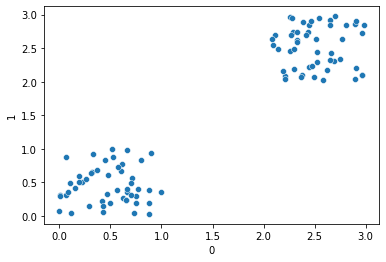

In [4]:
sns.scatterplot(Z[0],Z[1])

In [5]:
# Applying KMeans Clustering with 2 clusters:

KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [6]:
# Calculating the silhouette score:

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8242707314077591


We can say that the clusters are well apart from each other as the silhouette score is closer to 1.\
To check whether our silhouette score is providing the right information or not let’s create another scatter plot showing labelled data points.

C:\Users\aicyb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

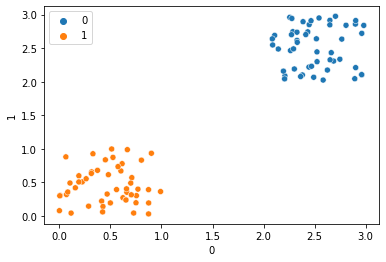

In [7]:
sns.scatterplot(Z[0],Z[1],hue=label)

It can be seen clearly in the above figure that each cluster is well apart from each other.\
Let’s try with 3 clusters:

Silhouette Score(n=3): 0.8242707314077591


C:\Users\aicyb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

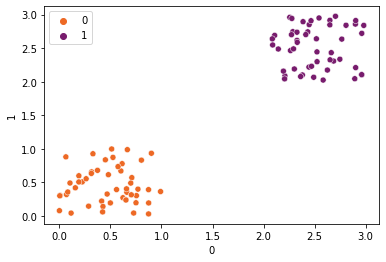

In [17]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
sns.scatterplot(Z[0],Z[1],hue=label,palette='inferno_r')

As you can see in the above figure clusters are not well apart. The inter cluster distance between cluster 1 and cluster 2 is almost negligible.That is why the silhouette score for n= 3(0.596) is lesser than that of n=2(0.806).

We can also use the silhouette score to check the optimal number of clusters. \
In the above example, we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of 3 clusters.

### Elbow

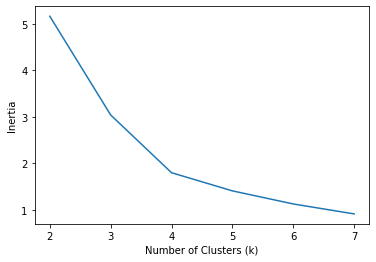

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7] # number of clusters
avg_distance=[] # compte inertia / metric for each cluster value
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X) # fit a k-Means clustering model
  avg_distance.append(clusterer.inertia_)
  
# elbow plot
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()